# Loss 와 Metric

# Confusion Matrix와 Precision/Recall

# Threshold의 변화에 따른 모델성능

* 모델의 파라미터 변화없이 출력값을 해석하는 방식만 달리해도 전혀다른 성능 나타냄<br><br>
* 성능척도 값도 달라짐

## IRIS 데이터 사용

In [1]:
#IRIS 데이터 사용
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
print(X.shape)

(150, 4)


## Task 재구성

* 일부러 노이즈 추가해 성능다운

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
# 데이터마다 800개 column 추가 [A,B,C,D] >>[A*200, B*200..]
X = np.c_[X, random_state.randn(n_samples, 200*n_features)]

print(X.shape)

(150, 804)


* 원래 3개의 label을 이진분류로 바꿔 2개로만 분류(binay classification)

In [4]:
# 0, 1 라벨에 속하는 붓꽃샘플만 사용하도록 제한
X_train, X_test, y_train, y_test = train_test_split(X[y<2],y[y<2],test_size=.5,
                                                   random_state=random_state)
print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


* SVM으로 모델구성후, test데이터로 정확도 확인

In [5]:
from sklearn import svm

In [6]:
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.48

In [7]:
# 성능 안좋으니 커널 변경
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [8]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [9]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

* SVM에서 제공하는 decision_function()은 (-1,1)범위의 0보다 작으면 음성(0), 크면 양성(1)으로 분류

In [10]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


* confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



* threshold 바꿔가며 값 변화 확인

In [13]:
y_pred_new_threshold = classifier.decision_function(X_test)>-0.1
y_pred_new_threshold

array([False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [14]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [15]:
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)

rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [16]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [17]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [18]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



# Precision-Recall 커브

* PR(Precision-Recall) 커브는 **Recall을 X축, Precision을 Y축**에 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것

In [19]:
# iris의 PR 커브
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

* threshold값에 무관하게 모델의전체적성능평가 >> PR커브 아래쪽 면적계산(AreaUnderCurve)

In [21]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.91')

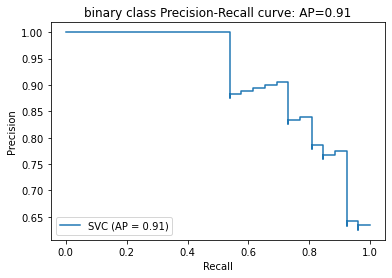

In [22]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

* 모델을 바꿔보면 AUC는 어떻게 될까


* SVM커널종류 : kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

In [23]:
from sklearn.metrics import average_precision_score

#my code
classifier1 = svm.SVC(kernel='poly', random_state=random_state)
classifier1.fit(X_train, y_train)

y_score = classifier1.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score:{0:0.2f}'.format(average_precision))


평균 precision-recall score:0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

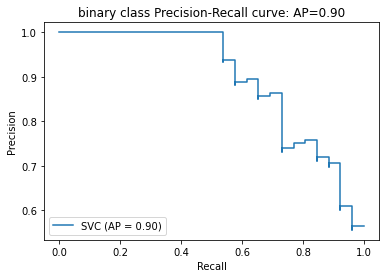

In [24]:
disp = plot_precision_recall_curve(classifier1, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# ROC 커브

* Confusion Matrix수치를 활용해, 분류기의 분류능력을 그래프로 표현

## ROC 예시곡선

![img](../Pictures/roc.png)

* TPR = Recall


* FPR = Negative중 잘못판정된것 (음성샘플에 대한 recall?)

## AUC 예시 영역

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('???')

???


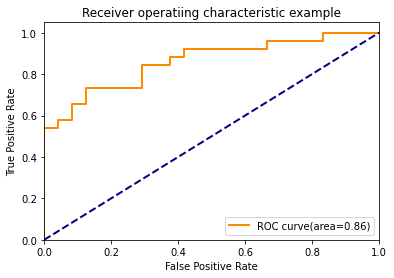

auc result:0.8605769230769231


In [28]:
plt.figure()
#lw = line width 폭
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver operatiing characteristic example')
plt.legend(loc='lower right')
plt.show()
print(f"auc result:{roc_auc}")

* SVM 커널의 종류를 바꿔 ROC, AUC 직접 작성

In [33]:
# my code (poly)
classifier1 = svm.SVC(kernel='poly', random_state=random_state)
classifier1.fit(X_train, y_train)
y_score = classifier1.decision_function(X_test) #not threshold


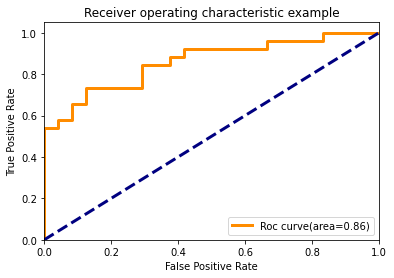

auc result:0.8605769230769231


In [36]:
# from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score)  #y_test : predict
roc_auc=auc(fpr, tpr)

plt.figure()
lw=3
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Roc curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

In [32]:
classifier1.decision_function(X_test)

array([-0.14568297, -0.13214274, -0.13563416, -0.13988702, -0.13779799,
       -0.14904274, -0.14327396, -0.14359661, -0.14116817, -0.14606966,
       -0.14493957, -0.14757516, -0.14417839, -0.14743214, -0.1359699 ,
       -0.14454421, -0.14570102, -0.14249401, -0.14241722, -0.14538301,
       -0.12975155, -0.14285321, -0.14437114, -0.13550366, -0.14441778,
       -0.14310892, -0.13207458, -0.13600372, -0.14881567, -0.14821455,
       -0.14468647, -0.13690237, -0.14707069, -0.13502038, -0.14446719,
       -0.13619406, -0.14247848, -0.14542726, -0.14243777, -0.14777304,
       -0.14431993, -0.14133579, -0.14291686, -0.13609667, -0.14148392,
       -0.13954567, -0.13775795, -0.13980778, -0.14171804, -0.14046797])

In [34]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

# 다양한 머신러닝 모델의 평가척도

## 회귀모델의 평가척도

MSE, RMSE, MAE, MAPE

## 랭킹모델의 평가척도